In [15]:
# machine learning related package
!pip install mlxtend

You should consider upgrading via the '/Users/Yuta/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


### 1. MBA for a bakery store

In [16]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

The dataset consists of 21293 observations from a bakery. The data file contains four variables, Date, Time, Transaction ID and Item. Transaction ID ranges from 1 through 9684

In [17]:
basket = pd.read_csv('BreadBasket_DMS.csv')

In [18]:
basket.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [19]:
basket.shape

(21293, 4)

In [20]:
basket['Item'].value_counts()

Coffee            5471
Bread             3325
Tea               1435
Cake              1025
Pastry             856
                  ... 
Polenta              1
Olum & polenta       1
Raw bars             1
Gift voucher         1
Bacon                1
Name: Item, Length: 95, dtype: int64

In [21]:
type(basket['Item'].value_counts())

pandas.core.series.Series

In [22]:
# Get the first 10
basket['Item'].value_counts().iloc[:10]

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
NONE              786
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Name: Item, dtype: int64

- data clean (drop duplicates is not necessary)

In [10]:
#basket = basket.drop_duplicates()

Using MLxtend library’s Apriori Algorithm for extracting itemsets for MBA

- First need to group the bread dataframe accordingly and display the count of items then to consolidate the items into one transaction per row with each product 1 hot encoded => Data Preperation

In [23]:
#1:
df = basket.groupby(['Transaction','Item']).size().reset_index(name = 'count') #GroupBy.size() => Compute group sizes.

#2:
df_basket = (df.groupby(['Transaction', 'Item'])['count'].sum().unstack().reset_index().fillna(0).set_index('Transaction'))

#3: encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = df_basket.applymap(encode_units)

In [24]:
df

,Transaction,Item,count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
19635,9682,Tacos/Fajita,1
19636,9682,Tea,1
19637,9683,Coffee,1
19638,9683,Pastry,1


In [27]:
df.shape

(19640, 3)

In [25]:
df_basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
basket_sets

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Generate frequent item sets with a minimum support of at least 1% (The probability of take place of this combination)

In [31]:
# Frequent_itemsets get all possible sets of combination (calculate the percentage of support)
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
44,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
42,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
28,(Medialuna),(Coffee),0.061379,0.475081,0.034939,0.569231,1.198175,0.005779,1.218561
35,(Pastry),(Coffee),0.085510,0.475081,0.047214,0.552147,1.162216,0.006590,1.172079
3,(Alfajores),(Coffee),0.036093,0.475081,0.019515,0.540698,1.138116,0.002368,1.142861
26,(Juice),(Coffee),0.038296,0.475081,0.020460,0.534247,1.124537,0.002266,1.127031
33,(NONE),(Coffee),0.079005,0.475081,0.042073,0.532537,1.120938,0.004539,1.122908
36,(Sandwich),(Coffee),0.071346,0.475081,0.037981,0.532353,1.120551,0.004086,1.122468
16,(Cake),(Coffee),0.103137,0.475081,0.054349,0.526958,1.109196,0.005350,1.109667
39,(Scone),(Coffee),0.034309,0.475081,0.017941,0.522936,1.100729,0.001642,1.100310


From the output, the lift of an association rule “if Toast then Coffee” is 1.48 because the confidence is 70%. 

This means that consumers who purchase Toast are 1.48 times more likely to purchase Coffee than randomly chosen customers. 

Larger lift means more interesting rules

### 2. MBA for Instacart

There are 3 Million Instacart Orders included in the dataset:

- EDA

In [32]:
order = pd.read_csv('orders.csv')

In [33]:
order.shape

(3421083, 7)

In [34]:
order.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


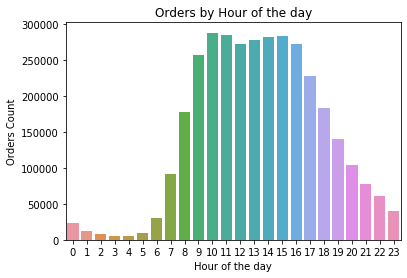

In [35]:
# Orders by Hour of the day:
sns.countplot(data = order, x = 'order_hour_of_day')
plt.xlabel('Hour of the day')
plt.ylabel('Orders Count')
plt.title('Orders by Hour of the day')
plt.show()

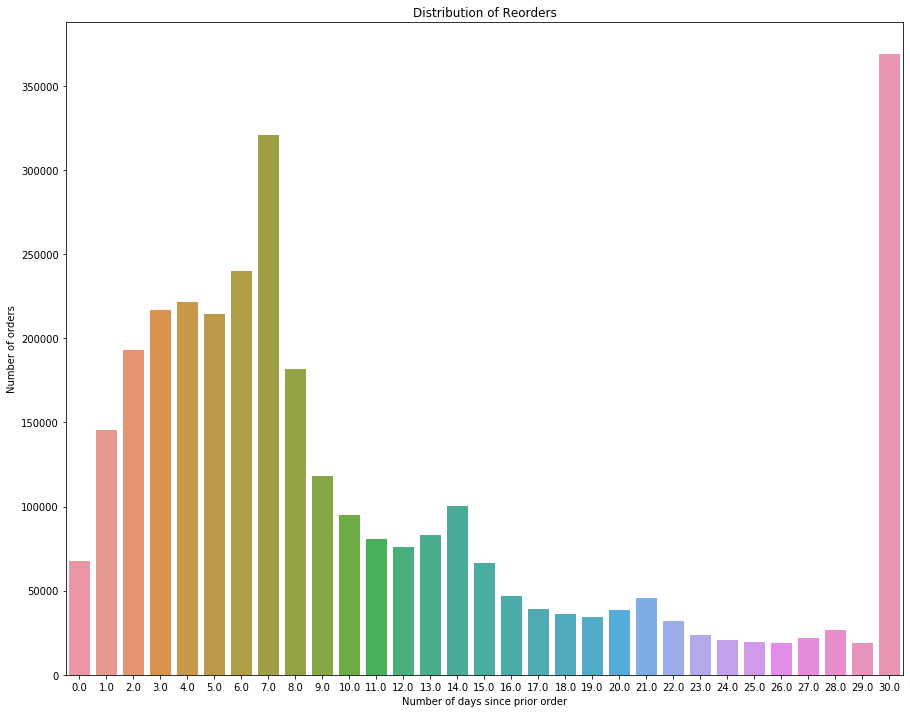

In [36]:
# Explore the distribution of days since prior order:
plt.subplots(figsize = (15, 12))
sns.countplot(data = order, x = 'days_since_prior_order')
plt.xlabel('Number of days since prior order')
plt.ylabel('Number of orders')
plt.title('Distribution of Reorders')
plt.show()

In [37]:
order_prior = pd.read_csv('order_products__prior.csv')

In [38]:
order_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [39]:
order_prior.shape

(32434489, 4)

In [40]:
products = pd.read_csv('products.csv')

In [41]:
products.shape

(49688, 4)

In [42]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [43]:
df_order = pd.merge(order_prior, products, on = 'product_id', how = 'inner')

In [44]:
df_order.shape

(32434489, 7)

In [45]:
df_order = pd.merge(df_order, order, on = 'order_id', how = 'inner')

In [46]:
df_order.shape

(32434489, 13)

In [48]:
df_order.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0


- upload aisle and department data; Using aisle for MBA analysis, because there are too many products

In [49]:
aisles = pd.read_csv('aisles.csv')

In [50]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [51]:
departments = pd.read_csv('departments.csv')

In [52]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [53]:
df_order = pd.merge(df_order, aisles, on = 'aisle_id', how = 'inner')

In [55]:
df_final = pd.merge(df_order, departments, on = 'department_id', how = 'inner')

In [56]:
df_final.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs,dairy eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,eggs,dairy eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,eggs,dairy eggs
3,327,33120,5,1,Organic Egg Whites,86,16,58707,prior,21,6,9,8.0,eggs,dairy eggs
4,390,33120,28,1,Organic Egg Whites,86,16,166654,prior,48,0,12,9.0,eggs,dairy eggs


In [57]:
df_final.shape

(32434489, 15)

In [58]:
df_final['aisle'].nunique()

134

In [59]:
df_final['department'].nunique()

21

In [60]:
df_final['order_id'].nunique()

3214874

In [61]:
mba = df_order[['order_id', 'aisle']]

In [62]:
mba.head()

,order_id,aisle
0,2,eggs
1,26,eggs
2,120,eggs
3,327,eggs
4,390,eggs


In [ ]:
#1:
df = mba.groupby(['order_id','aisle']).size().reset_index(name='count') #GroupBy.size() => Compute group sizes.

#2:
basket = (df.groupby(['order_id','aisle'])['count']
          .sum().unstack().reset_index().fillna(0)
          .set_index('order_id'))

#3: encoding
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)

In [ ]:
basket_sets.shape

In [ ]:
basket_sets=basket_sets.head(1000)

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)
frequent_itemsets

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)